In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/diwali-sales/Diwali Sales Data.csv


### Importing the data and observing it

In [2]:
#To avoid encoding error using encoding = 'unicode_escape'
#src: https://www.kaggle.com/datasets/prajwal6362venom/diwali-sales
df = pd.read_csv('/kaggle/input/diwali-sales/Diwali Sales Data.csv', encoding = 'unicode_escape')

In [3]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [4]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
df.tail()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN
11250,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188.0,NaN,NaN


In [7]:
df.sample(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
10599,1004013,Michelle,P00183242,F,26-35,26,0,Karnataka,Southern,Automobile,Household items,4,2273.0,NaN,NaN
9009,1003985,Jarboe,P00286442,M,46-50,47,0,Kerala,Southern,Media,Clothing & Apparel,3,5165.0,NaN,NaN
8656,1000817,Tracy,P00235342,F,18-25,18,1,Karnataka,Southern,Construction,Clothing & Apparel,4,5342.0,NaN,NaN
7002,1004495,Lichtenstein,P00302742,F,18-25,20,0,Uttarakhand,Central,Hospitality,Clothing & Apparel,3,7095.0,NaN,NaN
1808,1001647,Norvell,P00113942,F,18-25,24,0,Uttar Pradesh,Central,Aviation,Food,4,15747.0,NaN,NaN
8520,1005367,Barton,P00117742,F,18-25,24,0,Uttar Pradesh,Central,Healthcare,Clothing & Apparel,2,5409.0,NaN,NaN
4251,1005264,Barbara,P00117142,M,18-25,25,0,Uttar Pradesh,Central,Construction,Electronics & Gadgets,3,9957.0,NaN,NaN
78,1004607,Turumella,P00173342,M,26-35,35,0,Delhi,Central,Govt,Stationery,4,20981.0,NaN,NaN
7802,1001879,Dunbar,P00213742,F,26-35,33,0,Andhra Pradesh,Southern,Agriculture,Beauty,3,6150.0,NaN,NaN
5043,1002576,Cassandra,P00037042,F,18-25,24,1,Maharashtra,Western,Media,Clothing & Apparel,1,8711.0,NaN,NaN


In [8]:
df.shape

(11251, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [10]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [11]:
df.isna().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

* Here we don't have any outlier in this data.
* But there is null values in column 'Amount' and columns 'Status' and 'unnamed' are empty so we can drop these two columns.

### Data Cleaning

* Here we can see that overall mean is different with mean of individual category.
* Though we can delete those 12 rows as this number is too low compare to the total rows but let's try to fill these null values with mean of individual category.

In [12]:
df.drop(['Status', 'unnamed1'], axis = 1, inplace = True)

In [13]:
missing_value_df = df[df.isna().any(axis = 1)]
missing_value_df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN
14,1003858,Cano,P00293742,M,46-50,46,1,Madhya Pradesh,Central,Hospitality,Auto,3,NaN
16,1005447,Amy,P00275642,F,46-50,48,1,Andhra Pradesh,Southern,IT Sector,Auto,3,NaN
109,1005265,Sakshi,P00296242,F,46-50,48,1,Delhi,Central,Banking,Footwear & Shoes,1,NaN
111,1005261,Apoorva,P00057942,F,36-45,41,1,Delhi,Central,IT Sector,Footwear & Shoes,2,NaN
184,1005538,Kartik,P00269542,F,46-50,49,1,Karnataka,Southern,Banking,Footwear & Shoes,1,NaN
293,1000326,Jonathan,P00120542,M,51-55,53,0,Gujarat,Western,IT Sector,Footwear & Shoes,3,NaN
344,1002507,Lakshmi,P00045842,F,26-35,35,1,Gujarat,Western,Chemical,Furniture,1,NaN
345,1004498,Srishti,P00030842,F,51-55,55,0,Delhi,Central,Textile,Footwear & Shoes,1,NaN
452,1004601,Gaurav,P00014442,F,36-45,40,1,Madhya Pradesh,Central,Hospitality,Food,4,NaN


In [14]:
#Drop Null values
#df.dropna(inplace=True)

In [15]:
missing_value_df['Product_Category'].value_counts()

Footwear & Shoes    5
Auto                3
Food                3
Furniture           1
Name: Product_Category, dtype: int64

In [16]:
total_mean = df['Amount'].mean()
total_mean

9453.610857727557

In [17]:
# auto = df[df['Product_Category'] == 'Auto']
# auto['Amount'].mean()
auto_category_mean = df[df['Product_Category'] == 'Auto']['Amount'].mean()
auto_category_mean

20191.85556701031

In [18]:
footware_and_shoes_category_mean = df[df['Product_Category'] == 'Footwear & Shoes']['Amount'].mean()
footware_and_shoes_category_mean

14707.468791312558

In [19]:
food_category_mean = df[df['Product_Category'] == 'Food']['Amount'].mean()
food_category_mean

13628.065662650602

In [20]:
futniture_category_mean = df[df['Product_Category'] == 'Furniture']['Amount'].mean()
futniture_category_mean

15454.69315340909

In [21]:
missing_mean = [auto_category_mean, footware_and_shoes_category_mean, food_category_mean, futniture_category_mean]
missing_mean

[20191.85556701031, 14707.468791312558, 13628.065662650602, 15454.69315340909]

In [22]:
missing_category = ['Auto', 'Footwear & Shoes', 'Food', 'Furniture']
missing_category

['Auto', 'Footwear & Shoes', 'Food', 'Furniture']

In [23]:
missing_data = dict(zip(missing_category, missing_mean))
missing_data

{'Auto': 20191.85556701031,
 'Footwear & Shoes': 14707.468791312558,
 'Food': 13628.065662650602,
 'Furniture': 15454.69315340909}

In [24]:
df['Amount'].fillna(df['Product_Category'].map(missing_data), inplace = True)

In [25]:
df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

#### Let's handle Duplicate values

In [26]:
df.duplicated().sum()

8

Total 8 duplicate records are there.

In [27]:
duplicate_value_df = df[df.duplicated()]
duplicate_value_df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
19,1001883,Praneet,P00029842,M,51-55,54,1,Uttar Pradesh,Central,Hospitality,Auto,1,23568.0
4404,1004725,Jackson,P00150842,F,36-45,37,1,Maharashtra,Western,Hospitality,Electronics & Gadgets,4,9859.0
5703,1003208,Bowman,P00171642,F,26-35,31,0,Bihar,Eastern,Agriculture,Electronics & Gadgets,4,8088.0
5908,1001260,Dheeraj,P00344042,M,26-35,28,0,Maharashtra,Western,IT Sector,Electronics & Gadgets,4,8015.0
6173,1001325,Reese,P00111742,F,26-35,27,1,Gujarat,Western,Construction,Electronics & Gadgets,3,7923.0
8651,1000083,Gute,P00242842,M,26-35,35,0,Uttar Pradesh,Central,Hospitality,Clothing & Apparel,3,5345.0
8941,1001476,Anudeep,P00036842,M,18-25,25,0,Maharashtra,Western,IT Sector,Clothing & Apparel,4,5202.0
10571,1004404,Rittenbach,P00150142,F,26-35,28,1,Haryana,Northern,Aviation,Electronics & Gadgets,3,2304.0


In [28]:
df.drop_duplicates(inplace=True)

In [29]:
df.duplicated().sum()

0

So all duplicate records are removed.

##### Let's change the data type of 'Amount' field

In [30]:
df['Amount'] = df['Amount'].astype('int')
df['Amount'].dtypes

dtype('int64')

So, now our data is clean and ready to anayze😀

### Let's explore different fields

In [31]:
df['Gender'].value_counts()

F    7838
M    3405
Name: Gender, dtype: int64

In [32]:
df['Age Group'].value_counts()

26-35    4538
36-45    2285
18-25    1878
46-50     987
51-55     831
55+       428
0-17      296
Name: Age Group, dtype: int64

In [33]:
df['Marital_Status'].value_counts()

0    6518
1    4725
Name: Marital_Status, dtype: int64

In [34]:
df['State'].value_counts()

Uttar Pradesh       1944
Maharashtra         1523
Karnataka           1305
Delhi               1107
Madhya Pradesh       923
Andhra Pradesh       812
Himachal Pradesh     608
Kerala               453
Haryana              451
Bihar                433
Gujarat              428
Jharkhand            380
Uttarakhand          320
Rajasthan            231
Punjab               200
Telangana            125
Name: State, dtype: int64

In [35]:
df['Zone'].value_counts()

Central     4294
Southern    2695
Western     1951
Northern    1490
Eastern      813
Name: Zone, dtype: int64

In [36]:
df['Occupation'].value_counts()

IT Sector          1586
Healthcare         1408
Aviation           1309
Banking            1139
Govt                854
Hospitality         702
Media               637
Automobile          566
Chemical            542
Lawyer              531
Retail              501
Food Processing     423
Construction        413
Textile             350
Agriculture         282
Name: Occupation, dtype: int64

In [37]:
df['Product_Category'].value_counts()

Clothing & Apparel       2653
Food                     2493
Electronics & Gadgets    2082
Footwear & Shoes         1064
Household items           520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 353
Pet Care                  212
Office                    113
Stationery                112
Books                     103
Auto                       99
Decor                      96
Veterinary                 81
Tupperware                 72
Hand & Power Tools         26
Name: Product_Category, dtype: int64

## Analysis

### Gender

#### Plotting a bar chart for Gender vs count

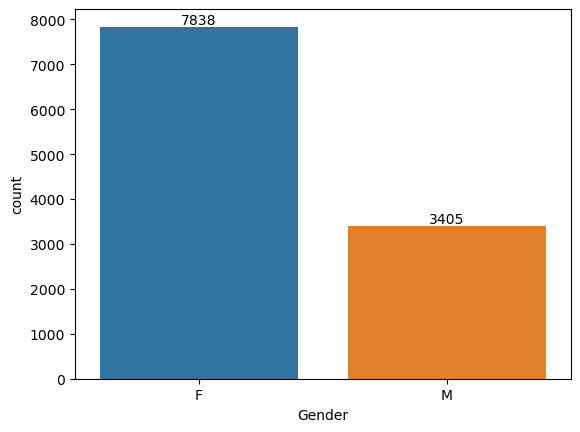

In [38]:
ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

#### Plotting a bar chart for Gender vs Total amount

In [39]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_gen

,Gender,Amount
0,F,74463227
1,M,31906044


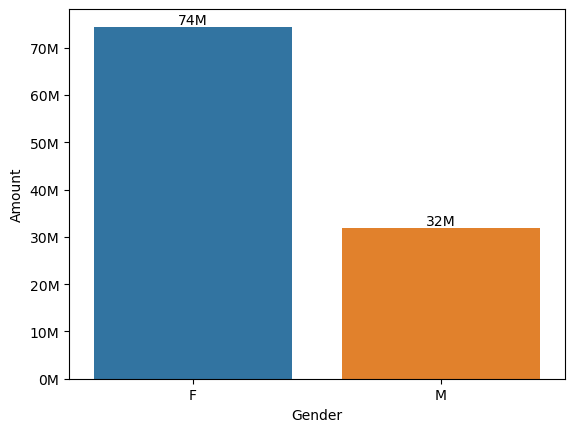

In [40]:
ax = sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

y_axis = plt.gca().get_yaxis()
y_axis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1000000:.0f}M'))

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / 1000000:.0f}M',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

After seeing above graphs we can see that most of the buyers are females and purchasing power of females are greater than males

### Age

#### Plotting a bar chart for Age group vs Count

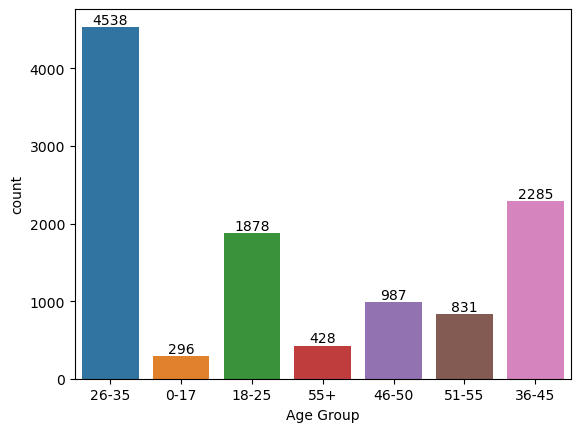

In [41]:
ax = sns.countplot(data = df, x = 'Age Group')

for bars in ax.containers:
    ax.bar_label(bars)

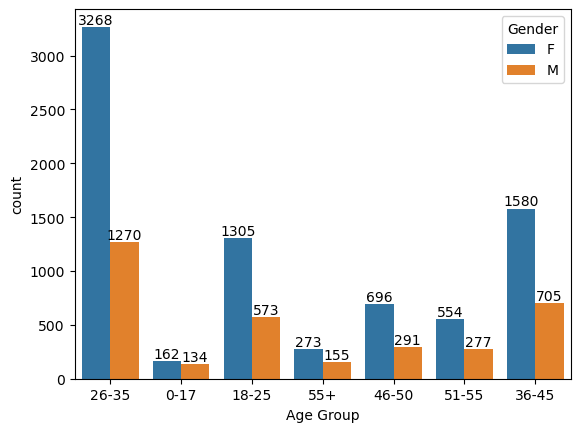

In [42]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

### Plotting a bar chart for Age Group vs Total amount

In [43]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_age

,Age Group,Amount
2,26-35,42610849
3,36-45,22177098
1,18-25,17235530
4,46-50,9277640
5,51-55,8267323
6,55+,4101178
0,0-17,2699653


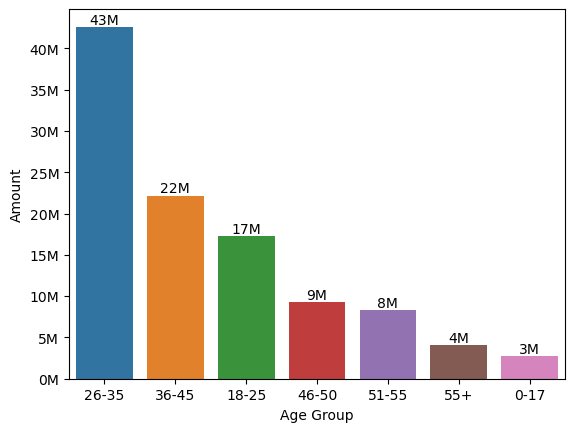

In [44]:
ax = sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

y_axis = plt.gca().get_yaxis()
y_axis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1000000:.0f}M'))

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / 1000000:.0f}M',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

From above graphs we can say that most of the buyers are from 26-35 age group females

### State

### Plotting a bar chart for State vs Orders

In [45]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)
sales_state

,State,Orders
14,Uttar Pradesh,4809
10,Maharashtra,3799
7,Karnataka,3241
2,Delhi,2744
9,Madhya Pradesh,2259
0,Andhra Pradesh,2054
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1106
3,Gujarat,1067


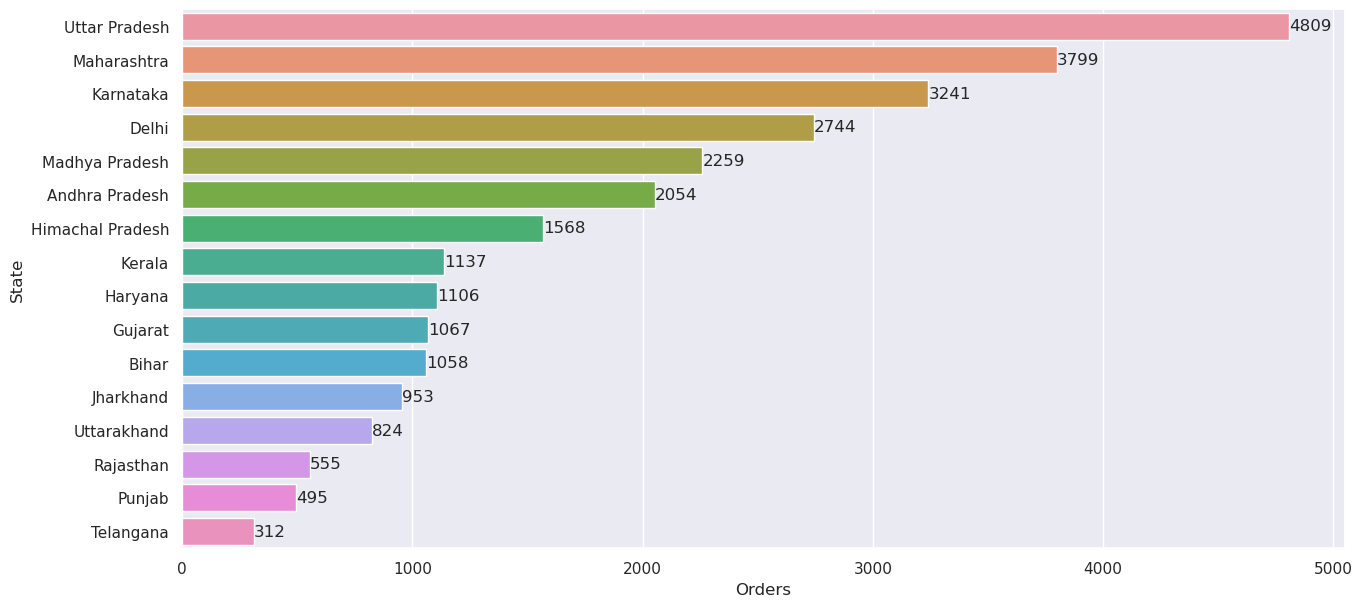

In [46]:
sns.set(rc={'figure.figsize':(15,7)})
ax = sns.barplot(data = sales_state, y = 'State',x= 'Orders')

for bars in ax.containers:
    ax.bar_label(bars)

#### Plotting a bar chart for State vs Total Amount

In [47]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_state

,State,Amount
14,Uttar Pradesh,19373311
10,Maharashtra,14424658
7,Karnataka,13538247
2,Delhi,11647939
9,Madhya Pradesh,8134961
0,Andhra Pradesh,8057337
5,Himachal Pradesh,4963368
4,Haryana,4217871
1,Bihar,4014669
3,Gujarat,3968320


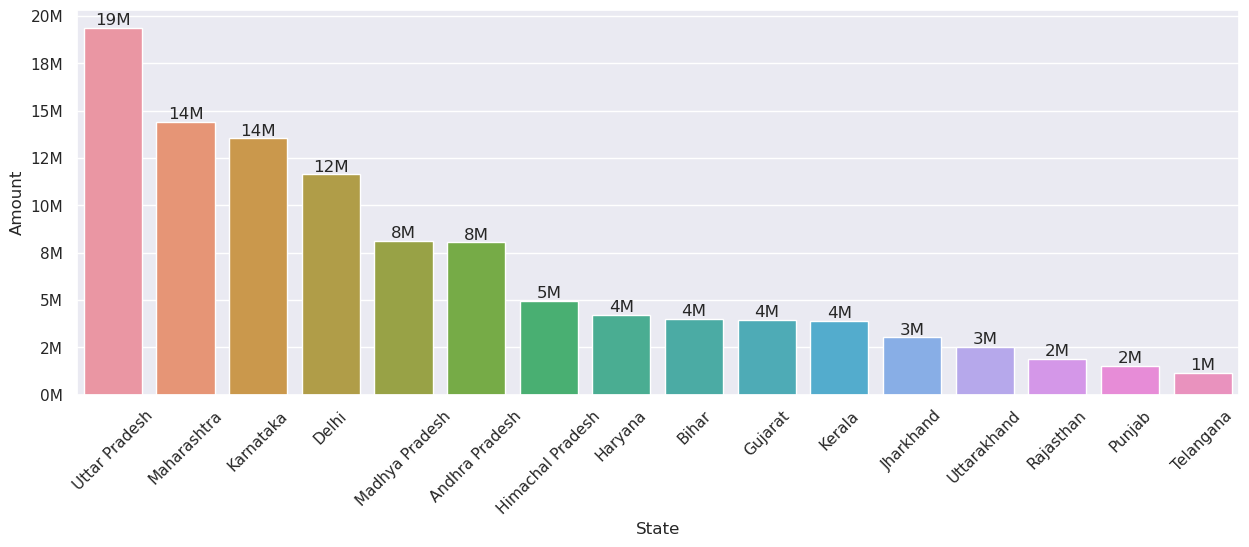

In [48]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(data = sales_state, x = 'State',y= 'Amount')
plt.xticks(rotation=45)
y_axis = plt.gca().get_yaxis()
y_axis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1000000:.0f}M'))

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / 1000000:.0f}M',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

### Marital Status

#### Plotting a bar chart for Marital status vs Count

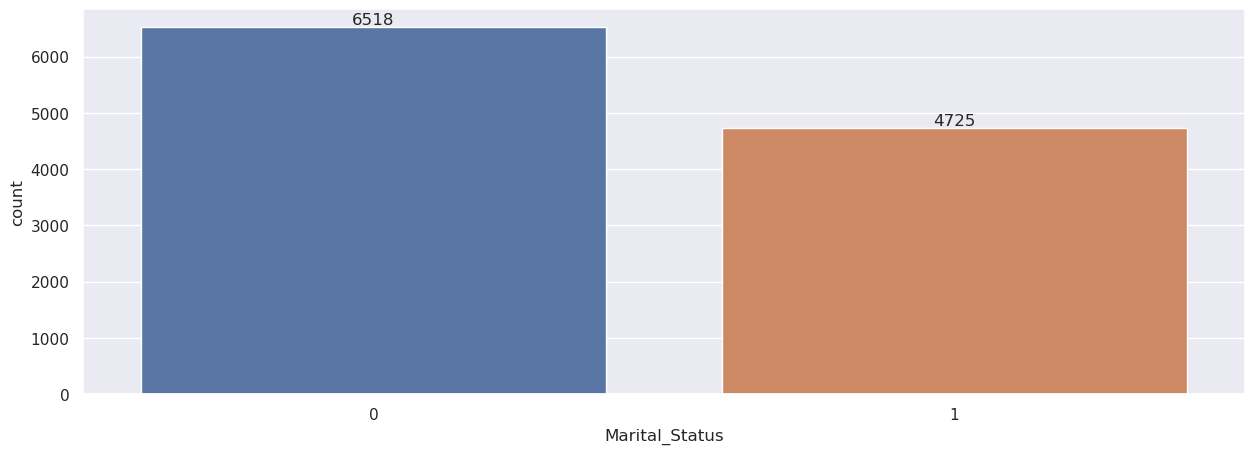

In [49]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

#### Plotting a bar chart for Marital Status vs Total amount

In [50]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_state

,Marital_Status,Gender,Amount
0,0,F,43827084
2,1,F,30636143
1,0,M,18334883
3,1,M,13571161


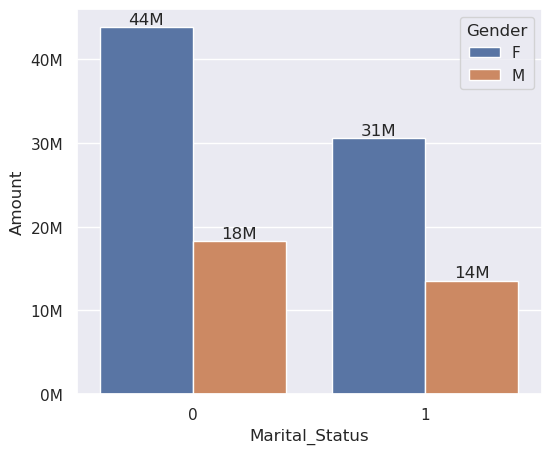

In [51]:
sns.set(rc={'figure.figsize':(6,5)})
ax = sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

y_axis = plt.gca().get_yaxis()
y_axis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1000000:.0f}M'))

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / 1000000:.0f}M',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

### Occupation

#### Plotting a bar chart for Occupation vs Count

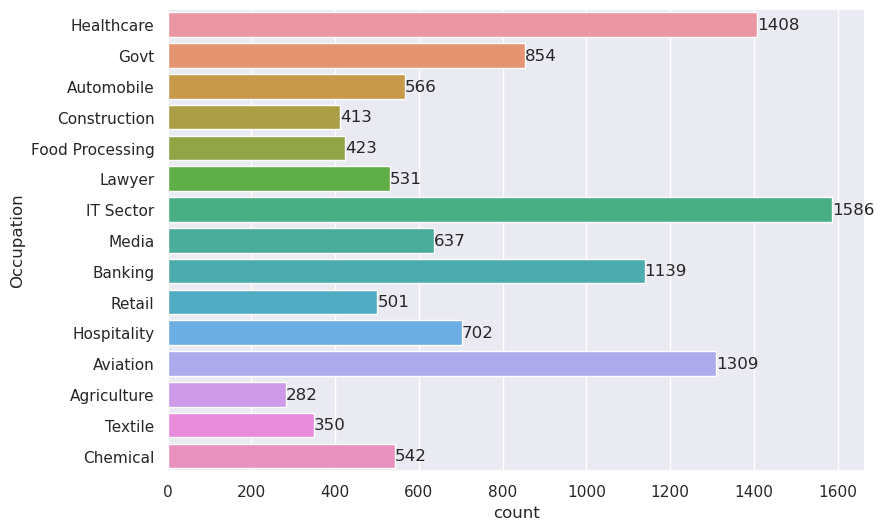

In [52]:
sns.set(rc={'figure.figsize':(9,6)})
ax = sns.countplot(data = df, y = 'Occupation')


for bars in ax.containers:
    ax.bar_label(bars)

#### Plotting a bar chart for Occupation vs Total amount

In [53]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_state

,Occupation,Amount
10,IT Sector,14825286
8,Healthcare,13034586
2,Aviation,12599994
3,Banking,10800024
7,Govt,8517212
9,Hospitality,6371452
12,Media,6295832
1,Automobile,5382224
4,Chemical,5312890
11,Lawyer,4981665


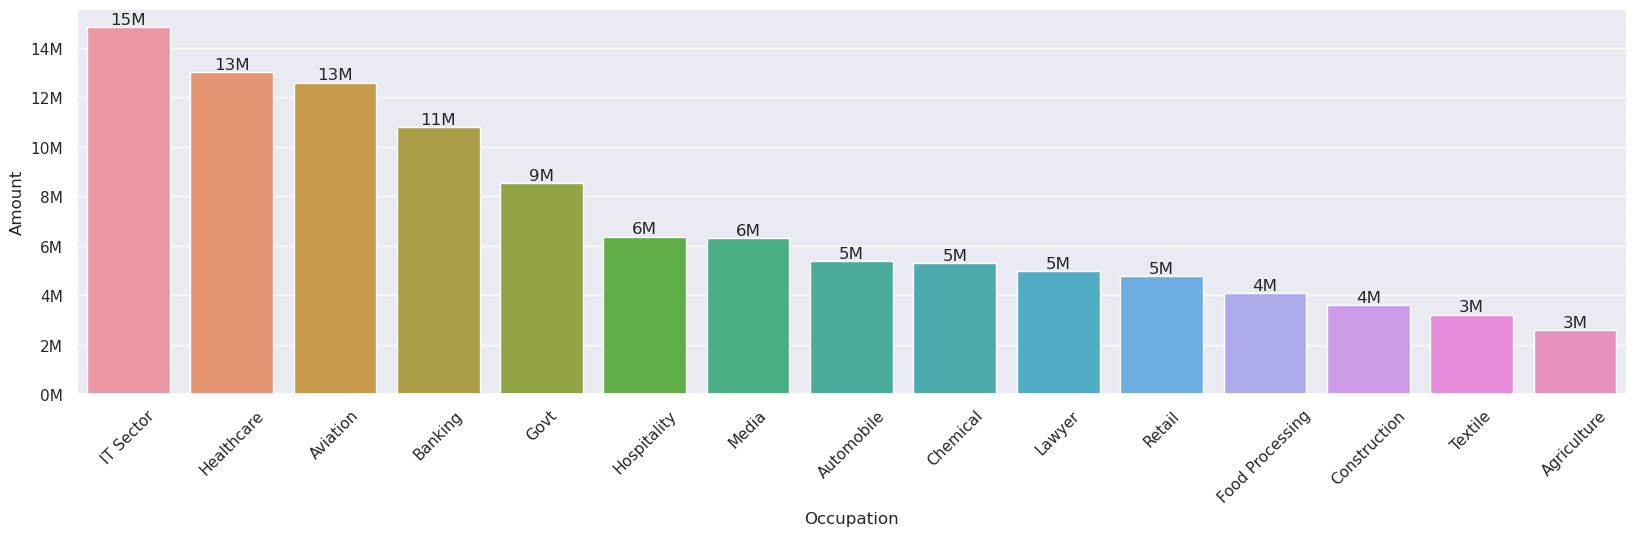

In [54]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')
plt.xticks(rotation=45)

y_axis = plt.gca().get_yaxis()
y_axis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1000000:.0f}M'))

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / 1000000:.0f}M',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

#### Plotting a bar chart for Product Category vs Count

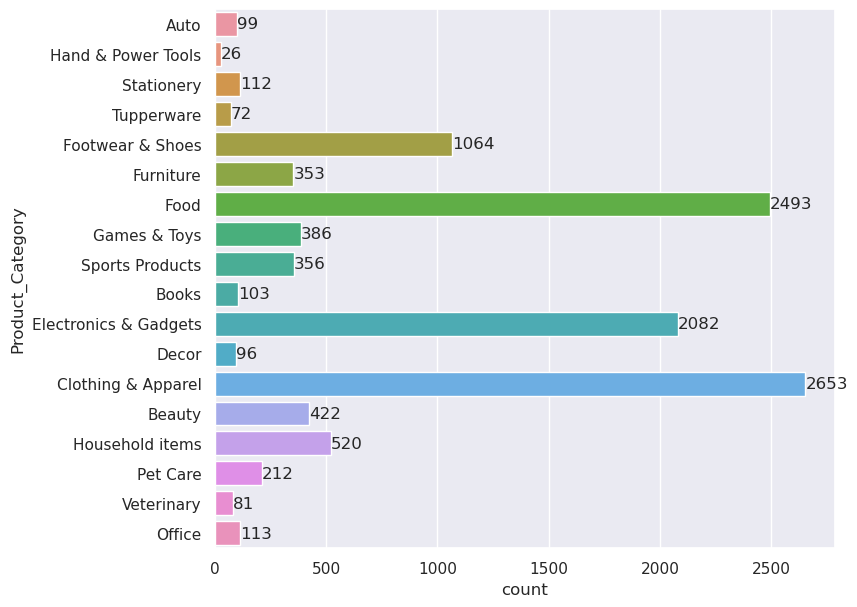

In [55]:
sns.set(rc={'figure.figsize':(8,7)})
ax = sns.countplot(data = df, y = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

#### Plotting a bar chart for Product Category vs Total amount

In [56]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sales_state

,Product_Category,Amount
6,Food,33974767
3,Clothing & Apparel,16484472
7,Footwear & Shoes,15648744
5,Electronics & Gadgets,15607657
8,Furniture,5455505
9,Games & Toys,4331694
14,Sports Products,3635933
0,Auto,1995614
1,Beauty,1959484
15,Stationery,1676051


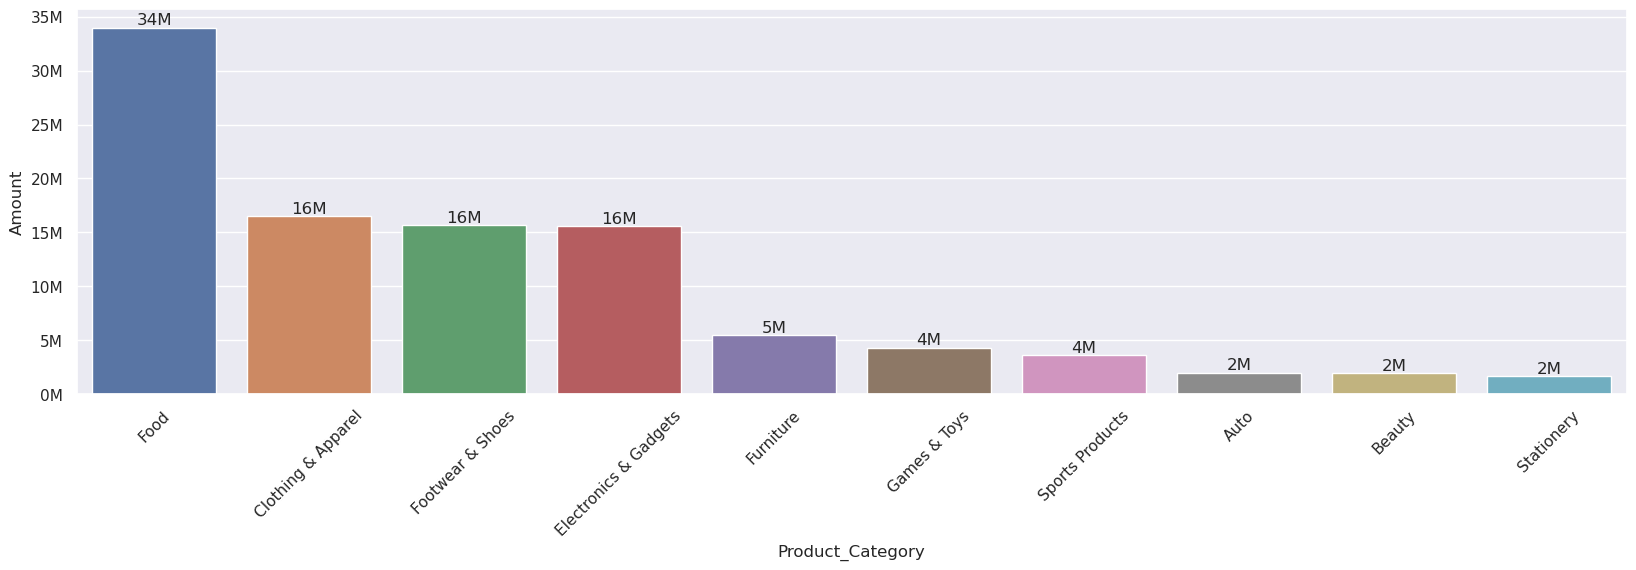

In [57]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

plt.xticks(rotation=45)

y_axis = plt.gca().get_yaxis()
y_axis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1000000:.0f}M'))

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / 1000000:.0f}M',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

# Conclusion
Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category